In [1]:
%display latex

# Substitutions

Replacing varibles:

In [2]:
a, x = var('a, x')

In [3]:
y = cos(x + a) * (x+1)
y

(x + 1)*cos(a + x)

In [4]:
y.subs(a = x)

(x + 1)*cos(2*x)

In [5]:
y.subs(a = pi/2 , x = pi/3)

-1/6*sqrt(3)*(pi + 3)

In [6]:
y(a = 10)

(x + 1)*cos(x + 10)

Replacing expressions:

In [7]:
y, z = var('y z')
f = x^3 + y^2 + z
f

x^3 + y^2 + z

In [8]:
f.subs(x^3 = 10)

SyntaxError: keyword can't be an expression (<ipython-input-8-e2f98c512f34>, line 1)

In [9]:
f.substitute(x^3 == 10)

y^2 + z + 10

In [10]:
f.substitute(x^3 == y^2, z == 1)

2*y^2 + 1

# Symbolic Functions

In [11]:
reset()

In [12]:
f(x) = (2 * x + 1)^3
f

x |--> (2*x + 1)^3

In [13]:
type(f)

<class 'sage.symbolic.expression.Expression'>

In [14]:
f(2)

125

In [15]:
expand(f)

x |--> 8*x^3 + 12*x^2 + 6*x + 1

Converting symbolic expression to symbolic function:

In [16]:
x, y = var('x y')

g = x^2 + y^3
g

y^3 + x^2

In [17]:
type(g)

<class 'sage.symbolic.expression.Expression'>

In [18]:
g(5, 2)

33

In [19]:
h = g.function(x, y)
h

(x, y) |--> y^3 + x^2

In [20]:
h(10, 2)b

108

General function:

In [84]:
f = function('f')(x)
f

f(x)

In [85]:
type(f)

<class 'sage.symbolic.expression.Expression'>

In [87]:
diff(f, x, 2)

diff(f(x), x, x)

In [89]:
reset()

# Common Transformation Functions

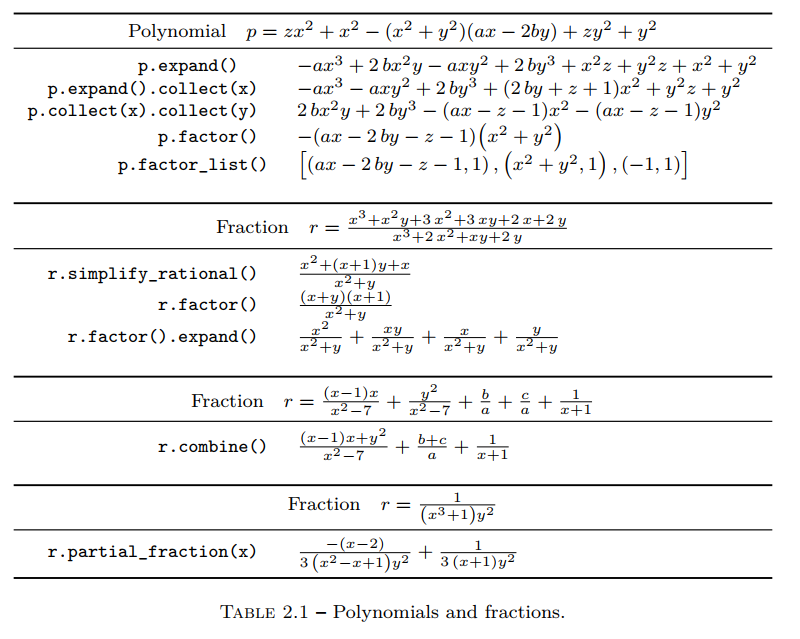

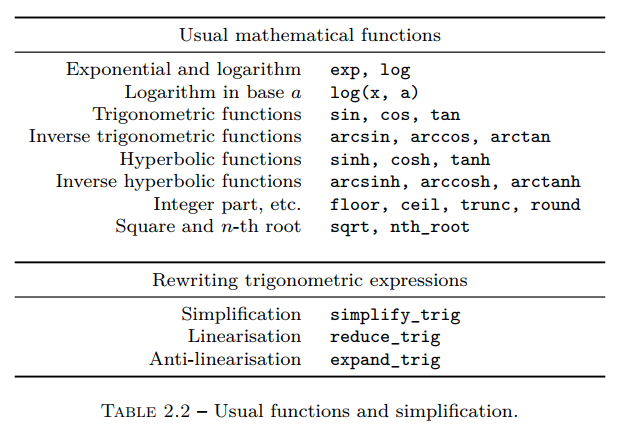

In [21]:
f(x) = (e^x-1)/(1+e^(x/2))
f

x |--> (e^x - 1)/(e^(1/2*x) + 1)

In [22]:
f.canonicalize_radical()

x |--> e^(1/2*x) - 1

In [23]:
f(n) = factorial(n+1)/factorial(n)
f

n |--> factorial(n + 1)/factorial(n)

In [24]:
f.simplify_factorial()

n |--> n + 1

The `simplify_rational` method tries to simplify a fraction; whereas to simplify
square roots, logarithms or exponentials, the `canonicalize_radical` method is
recommended

In [25]:
f(x) = sqrt(abs(x)^2)
f

x |--> abs(x)

In [26]:
f(x, y) = log(x*y)
f

(x, y) |--> log(x*y)

In [27]:
f.canonicalize_radical()

(x, y) |--> log(x) + log(y)

In [28]:
f.full_simplify()

(x, y) |--> log(x*y)

# Making Assumptions

During a computation, the symbolic variables appearing in expressions are in
general considered as taking potentially any value in the complex plane.

In [29]:
assume(x > 0)

In [30]:
sqrt(x^2) == x

x == x

In [31]:
assumptions()

[x > 0]

In [32]:
forget(x > 0)
assumptions()

[]

In [33]:
sqrt(x^2) == x

sqrt(x^2) == x

In [34]:
n = var('n')

In [35]:
f = sin(n * pi)
f

sin(pi*n)

In [36]:
f(1), f(2), f(1.5)

(0, 0, sin(1.50000000000000*pi))

In [38]:
assume(n, 'integer')

f = sin(n * pi)
f

0

In [39]:
assumptions()

[n is integer]

In [41]:
forget(n, 'integer')
assumptions()

[]

# Simplication Pitfalls

In [45]:
a = var('a')
assume(a, 'real')

c = cos(a) ^ 2 + sin(a) ^ 2 - 1
c

cos(a)^2 + sin(a)^2 - 1

In [47]:
c.full_simplify()

0

In [48]:
c.is_zero()

True

In [49]:
c.simplify_trig()

0

So the solution to $c  x = 0$ for x is anything!

In [51]:
c*x

(cos(a)^2 + sin(a)^2 - 1)*x

In [52]:
solve(c*x, x)

[x == 0]

# Solving Equations

The main functions:

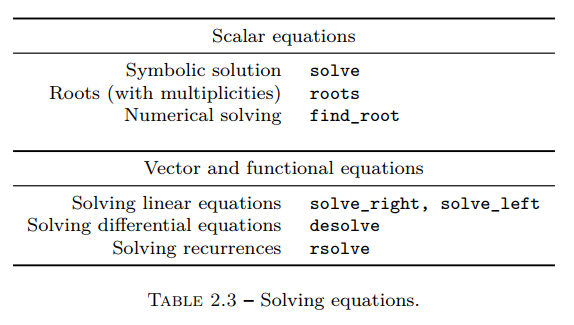

In [57]:
z, phi = var('z', 'phi')
eq = z^2 - 2/cos(phi) * z + 5/cos(phi)^2 - 4 == 0
eq

z^2 - 2*z/cos(phi) + 5/cos(phi)^2 - 4 == 0

In [59]:
eq.lhs()

z^2 - 2*z/cos(phi) + 5/cos(phi)^2 - 4

In [60]:
eq.rhs()

0

In [61]:
solve(eq, z)

[z == -(2*sqrt(cos(phi)^2 - 1) - 1)/cos(phi), z == (2*sqrt(cos(phi)^2 - 1) + 1)/cos(phi)]

In [62]:
solve(eq, z, solution_dict=True)

[{z: -(2*sqrt(cos(phi)^2 - 1) - 1)/cos(phi)},
 {z: (2*sqrt(cos(phi)^2 - 1) + 1)/cos(phi)}]

Solving a system of equations:

In [63]:
eqn1 = x+y == 3
eqn2 = 2*x+2*y == 6

In [64]:
solve([eqn1, eqn2], x, y)

[[x == -r1 + 3, y == r1]]

The the free parameters!

Solving inequalities:

In [65]:
f = x^2 + x - 1 > 0
f

x^2 + x - 1 > 0

In [66]:
solve(f, x)

[[x < -1/2*sqrt(5) - 1/2], [x > 1/2*sqrt(5) - 1/2]]

In [72]:
assume(x, 'integer')
soln = solve(f, x)
soln

[[x < -1/2*sqrt(5) - 1/2], [x > 1/2*sqrt(5) - 1/2]]

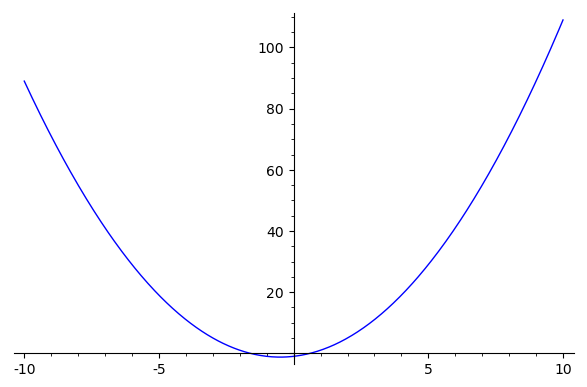

In [68]:
plot(f.lhs(), x, -10, 10)

In [77]:
soln1 = soln[0][0].rhs()
numerical_approx(soln1, digits=4)

-1.618

In [78]:
??solve